## The Geospatial Risk Mapping For NCDs




#### Flow of Our Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- Non-communicable diseases (NCDs) are rising globally and in India, driven not only by lifestyle factors but also by socio-environmental conditions such as air pollution, urbanization, and socioeconomic disparities. Existing research often overlooks the spatial dimension of these risks, limiting our understanding of geographic clustering and multi-factor interactions. There is a need for an integrated geospatial analysis to link NCD prevalence with socio-environmental determinants, enabling targeted, location-specific interventions for effective public health planning.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,District,Year,Age,Gender,Tobacco_Use,Alcohol_Use,Hypertension,Diabetes,Aging_Population,Obese(%),...,PM2.5,NO2,SO2,Population_Density,SES_Income,Healthcare_Access,Sleep_Hours,Urban_or_Rural,NDVI,Disease_NCD
0,Sukma,2020,44,Male,Yes,Yes,Yes,No,No,8.6,...,60.7,24.0,7.4,814,Low,Poor,7.7,Rural,0.629,CVD
1,Shajapur,2021,44,Female,No,No,No,Yes,No,22.3,...,65.9,25.9,13.2,1489,Medium,Moderate,7.2,Rural,0.347,Stroke
2,Goalpara,2021,52,Male,Yes,Yes,Yes,Yes,No,19.4,...,83.1,35.2,19.5,1473,Low,Moderate,7.4,Rural,0.100,CVD
3,Bastar,2021,45,Male,Yes,Yes,Yes,No,No,14.8,...,76.5,27.4,14.0,1483,Low,Poor,7.6,Rural,0.100,CVD
4,Kutch,2021,57,Male,No,No,Yes,Yes,No,20.6,...,37.5,19.1,7.0,833,Low,Poor,7.1,Rural,0.709,CVD


#### Shape of the dataset

In [4]:
df.shape

(19732, 21)

### 2.2 Dataset information

-District: Name of district (categorical, e.g., Sukma, Shajapur, Goalpara …)

-Year: Year of record (2018–2022)

-Age: Age of individuals (18–79 years)

-Gender: Sex of individuals → (Male, Female)

-Tobacco_Use: Tobacco consumption → (Yes, No)

-Alcohol_Use: Alcohol consumption → (Yes, No)

-Hypertension: Presence of hypertension → (Yes, No)

-Diabetes: Presence of diabetes → (Yes, No)

-Aging_Population: Whether individual is in aging group (Yes, No)

-Obese(%): Percentage of obese population (5–50%)

-Cholesterol(%): Percentage with high cholesterol (10–60%)

-PM2.5: Air pollution level (10–99.3 µg/m³)

-NO2: Nitrogen dioxide concentration (5–47.2 µg/m³)

-SO2: Sulfur dioxide concentration (2–20 µg/m³)

-Population_Density: Density of population (155–25,373 per sq. km)

-SES_Income: Socio-economic status by income → (Low, Medium, High)

-Healthcare_Access: Availability of healthcare services → (Poor, Moderate, Good)

-Sleep_Hours: Average daily sleep hours (5.8–9.0 hours)

-Urban_or_Rural: Settlement type → (Urban, Rural)

-NDVI: Vegetation index (0.1–0.8)

-Disease_NCD: Type of non-communicable disease → (CVD, Stroke, Lung_Cancer, Liver_Cancer, Breast_Cancer, None)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

District                0
Year                    0
Age                     0
Gender                  0
Tobacco_Use             0
Alcohol_Use             0
Hypertension            0
Diabetes                0
Aging_Population        0
Obese(%)                0
Cholesterol(%)          0
PM2.5                   0
NO2                     0
SO2                     0
Population_Density      0
SES_Income              0
Healthcare_Access       0
Sleep_Hours             0
Urban_or_Rural          0
NDVI                    0
Disease_NCD           539
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19732 entries, 0 to 19731
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            19732 non-null  object 
 1   Year                19732 non-null  int64  
 2   Age                 19732 non-null  int64  
 3   Gender              19732 non-null  object 
 4   Tobacco_Use         19732 non-null  object 
 5   Alcohol_Use         19732 non-null  object 
 6   Hypertension        19732 non-null  object 
 7   Diabetes            19732 non-null  object 
 8   Aging_Population    19732 non-null  object 
 9   Obese(%)            19732 non-null  float64
 10  Cholesterol(%)      19732 non-null  float64
 11  PM2.5               19732 non-null  float64
 12  NO2                 19732 non-null  float64
 13  SO2                 19732 non-null  float64
 14  Population_Density  19732 non-null  int64  
 15  SES_Income          19732 non-null  object 
 16  Heal

### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

District              397
Year                    5
Age                    62
Gender                  2
Tobacco_Use             2
Alcohol_Use             2
Hypertension            2
Diabetes                2
Aging_Population        2
Obese(%)              401
Cholesterol(%)        473
PM2.5                 742
NO2                   395
SO2                   181
Population_Density    440
SES_Income              3
Healthcare_Access       3
Sleep_Hours            33
Urban_or_Rural          2
NDVI                  628
Disease_NCD             5
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,Year,Age,Obese(%),Cholesterol(%),PM2.5,NO2,SO2,Population_Density,Sleep_Hours,NDVI
count,19732.000000,19732.000000,19732.000000,19732.000000,19732.000000,19732.000000,19732.000000,19732.000000,19732.000000,19732.000000
mean,2020.007653,48.503598,18.351019,24.975791,52.902792,21.193331,11.160926,1303.759933,7.754627,0.454989
std,1.414569,17.890120,7.557759,10.832945,13.603316,6.978696,3.401830,1740.252256,0.467324,0.183392
min,2018.000000,18.000000,5.000000,10.000000,10.000000,5.000000,2.000000,155.000000,5.800000,0.100000
25%,2019.000000,33.000000,12.900000,15.700000,42.900000,16.200000,8.600000,798.000000,7.500000,0.286000
50%,2020.000000,48.000000,18.100000,24.300000,52.600000,20.700000,11.200000,812.000000,7.800000,0.468000
75%,2021.000000,64.000000,23.300000,33.000000,63.000000,25.900000,13.700000,1500.000000,8.100000,0.611000
max,2022.000000,79.000000,50.000000,60.000000,99.300000,47.200000,20.000000,25373.000000,9.000000,0.800000


### 3.6 Exploring Data

In [10]:
df.head()

,District,Year,Age,Gender,Tobacco_Use,Alcohol_Use,Hypertension,Diabetes,Aging_Population,Obese(%),...,PM2.5,NO2,SO2,Population_Density,SES_Income,Healthcare_Access,Sleep_Hours,Urban_or_Rural,NDVI,Disease_NCD
0,Sukma,2020,44,Male,Yes,Yes,Yes,No,No,8.6,...,60.7,24.0,7.4,814,Low,Poor,7.7,Rural,0.629,CVD
1,Shajapur,2021,44,Female,No,No,No,Yes,No,22.3,...,65.9,25.9,13.2,1489,Medium,Moderate,7.2,Rural,0.347,Stroke
2,Goalpara,2021,52,Male,Yes,Yes,Yes,Yes,No,19.4,...,83.1,35.2,19.5,1473,Low,Moderate,7.4,Rural,0.100,CVD
3,Bastar,2021,45,Male,Yes,Yes,Yes,No,No,14.8,...,76.5,27.4,14.0,1483,Low,Poor,7.6,Rural,0.100,CVD
4,Kutch,2021,57,Male,No,No,Yes,Yes,No,20.6,...,37.5,19.1,7.0,833,Low,Poor,7.1,Rural,0.709,CVD


In [ ]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'tobacco_use' variable:  ",end=" ")
print(df['Tobacco_Use'].unique())

print("Categories in'Alcohol_Use' variable:",end=" " )
print(df['Alcohol_Use'].unique())

print("Categories in 'Hypertension' variable:     ",end=" " )
print(df['Hypertension'].unique())

print("Categories in 'Diabetes' variable:     ",end=" " )
print(df['Diabetes'].unique())

print("Categories in 'Aging_Population' variable:     ",end=" " )
print(df['Aging_Population'].unique())

print("Categories in 'SES_Income' variable:     ",end=" " )
print(df['SES_Income'].unique())

print("Categories in 'Healthcare_Access' variable:     ",end=" " )
print(df['Healthcare_Access'].unique())

print("Categories in 'Urban_or_Rural' variable:     ",end=" " )
print(df['Urban_or_Rural'].unique())

print("Categories in 'Disease_NCD' variable:     ",end=" " )
print(df['Disease_NCD'].unique())

Categories in 'Gender' variable:      ['Male' 'Female']
Categories in 'tobacco_use' variable:   ['Yes' 'No']
Categories in'Alcohol_Use' variable: ['Yes' 'No']
Categories in 'Hypertension' variable:      ['Yes' 'No']
Categories in 'Diabetes' variable:      ['No' 'Yes']
Categories in 'Aging_Population' variable:      ['No' 'Yes']
Categories in 'SES_Income' variable:      ['Low' 'Medium' 'High']
Categories in 'Healthcare_Access' variable:      ['Poor' 'Moderate' 'Good']
Categories in 'Urban_or_Rural' variable:      ['Rural' 'Urban']
Categories in 'Disease_NCD' variable:      ['CVD' 'Stroke' 'Lung_Cancer' 'Liver_Cancer' nan 'Breast_Cancer']


In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Year', 'Age', 'Obese(%)', 'Cholesterol(%)', 'PM2.5', 'NO2', 'SO2', 'Population_Density', 'Sleep_Hours', 'NDVI']

We have 11 categorical features : ['District', 'Gender', 'Tobacco_Use', 'Alcohol_Use', 'Hypertension', 'Diabetes', 'Aging_Population', 'SES_Income', 'Healthcare_Access', 'Urban_or_Rural', 'Disease_NCD']


### 3.7 Numerical Summary

In [15]:
print("\nNumerical Summary:\n", df.describe().T)

num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


Numerical Summary:
                       count         mean          std     min       25%  \
Year                19732.0  2020.007653     1.414569  2018.0  2019.000   
Age                 19732.0    48.503598    17.890120    18.0    33.000   
Obese(%)            19732.0    18.351019     7.557759     5.0    12.900   
Cholesterol(%)      19732.0    24.975791    10.832945    10.0    15.700   
PM2.5               19732.0    52.902792    13.603316    10.0    42.900   
NO2                 19732.0    21.193331     6.978696     5.0    16.200   
SO2                 19732.0    11.160926     3.401830     2.0     8.600   
Population_Density  19732.0  1303.759933  1740.252256   155.0   798.000   
Sleep_Hours         19732.0     7.754627     0.467324     5.8     7.500   
NDVI                19732.0     0.454989     0.183392     0.1     0.286   

                         50%       75%      max  
Year                2020.000  2021.000   2022.0  
Age                   48.000    64.000     79.0  
Obe

### correlation heatmap

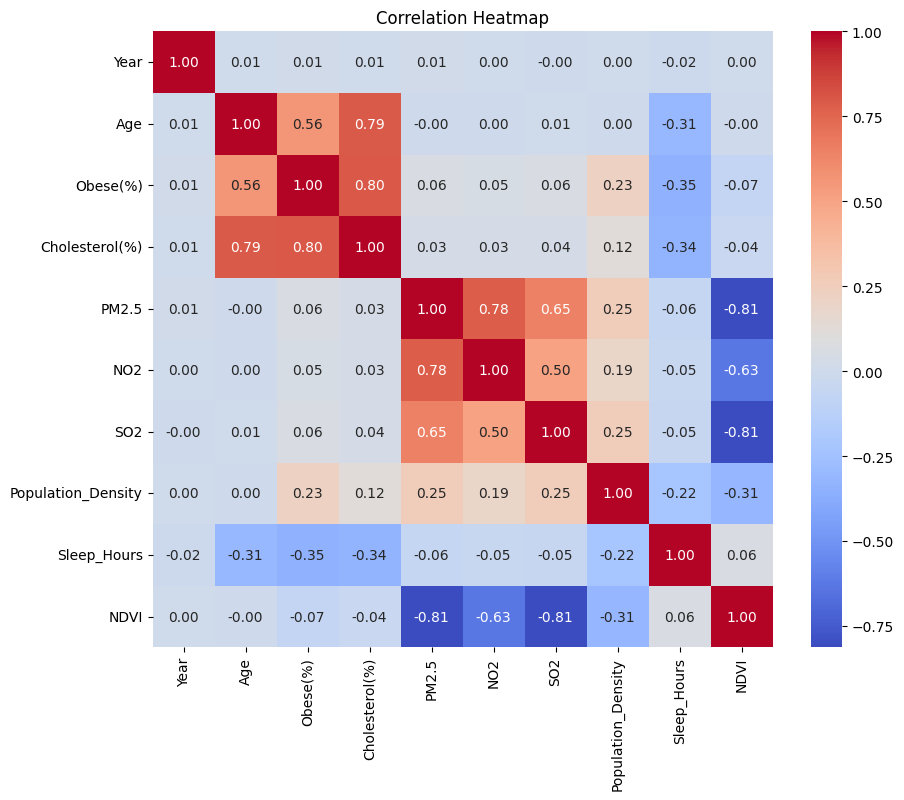

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Distribution of numerical features


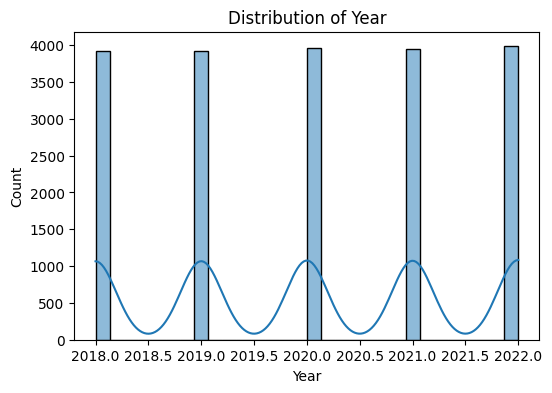

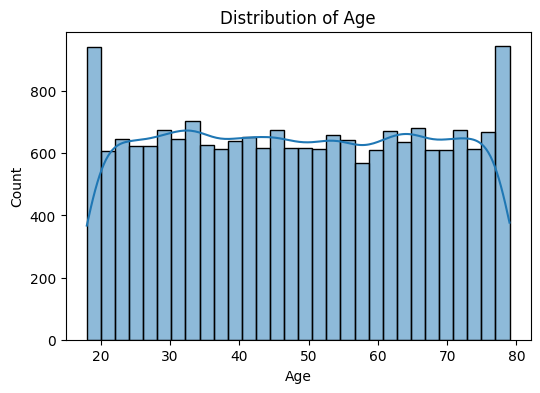

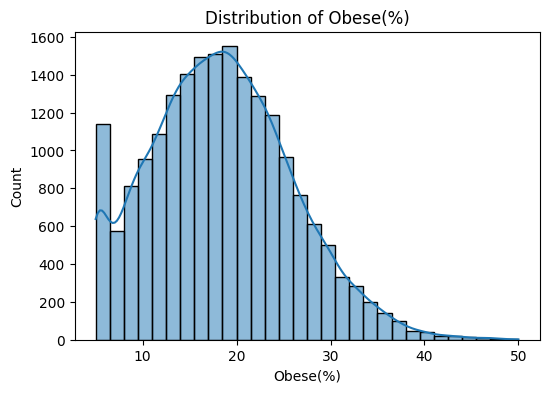

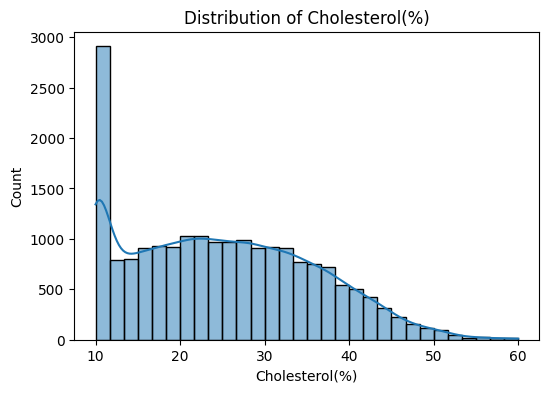

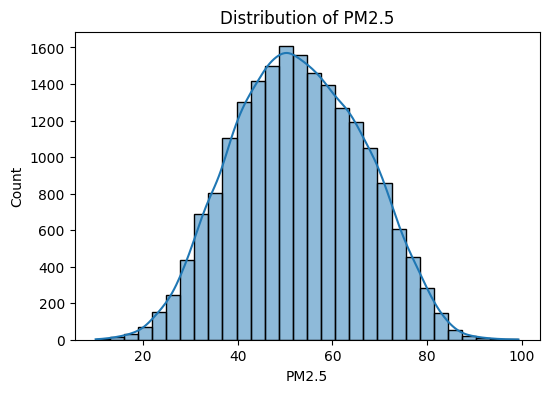

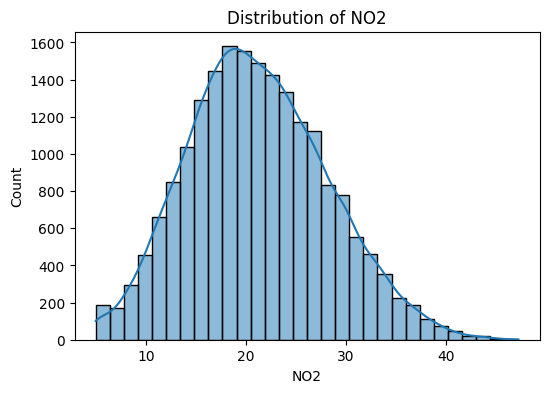

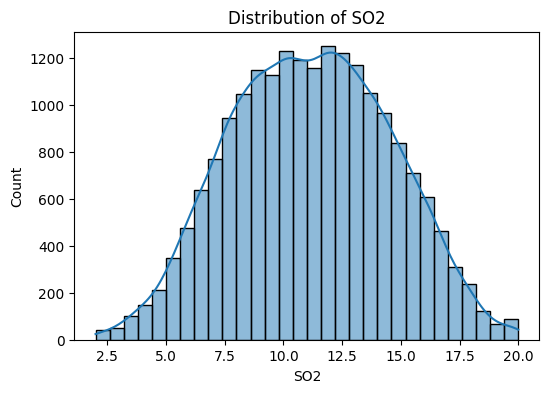

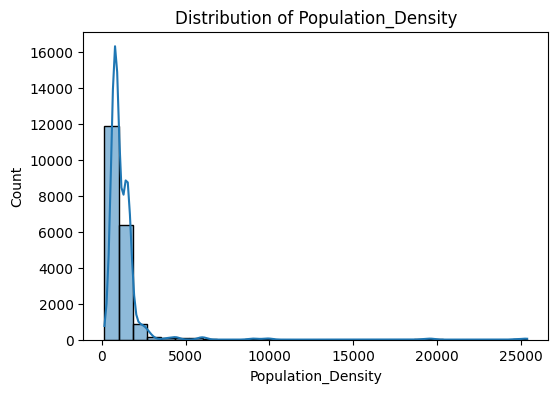

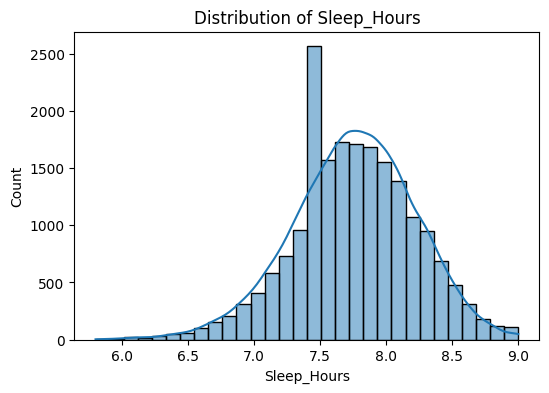

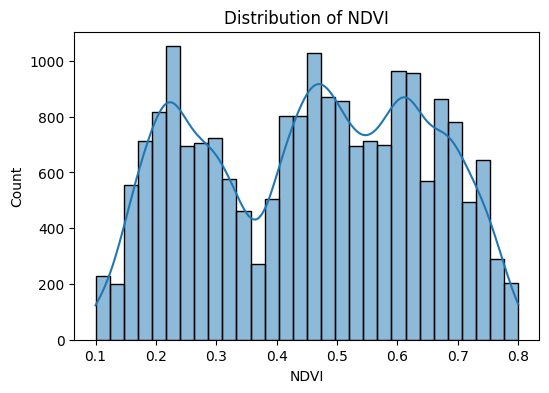

In [17]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

### Countplots for Categorical Features

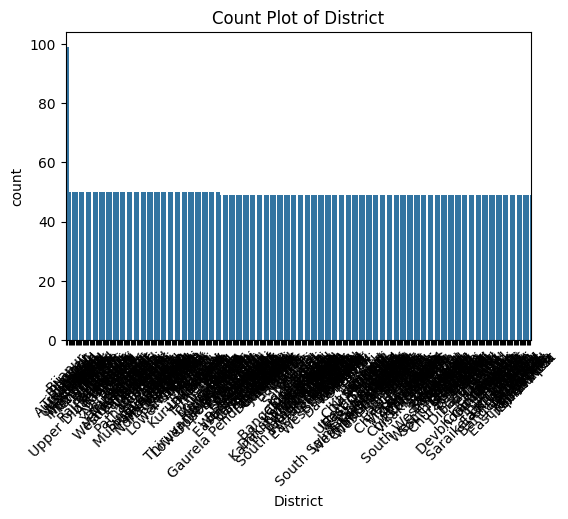

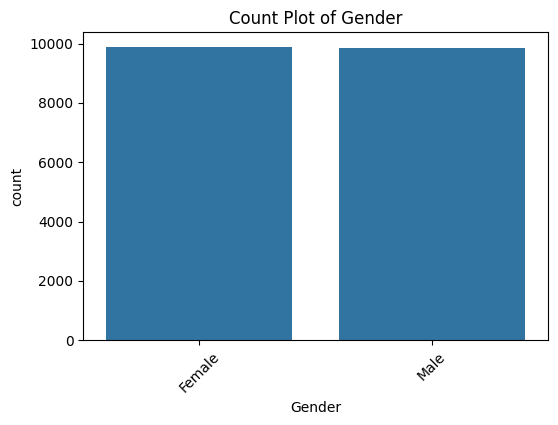

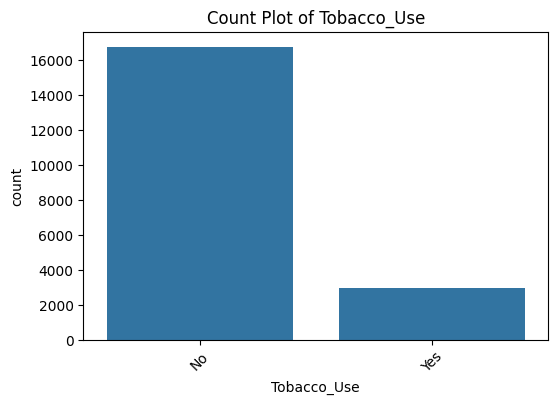

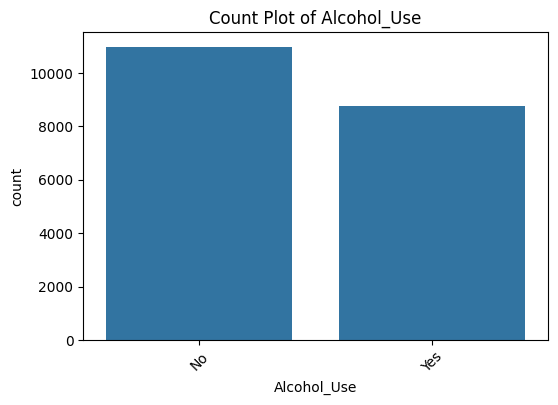

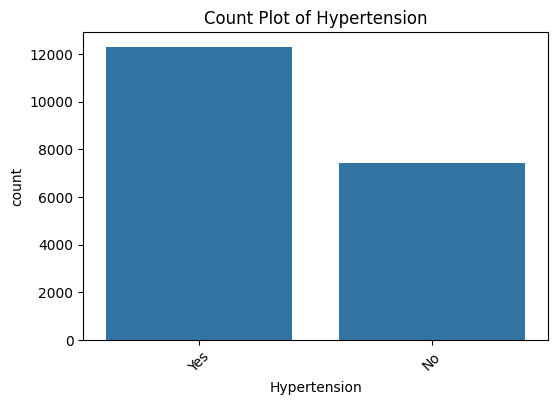

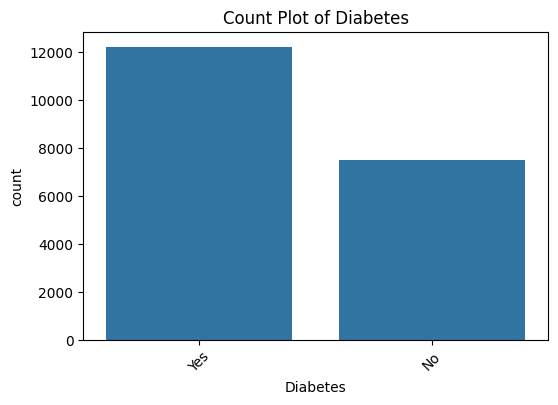

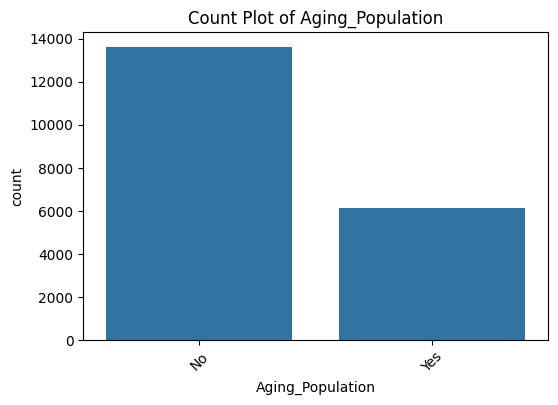

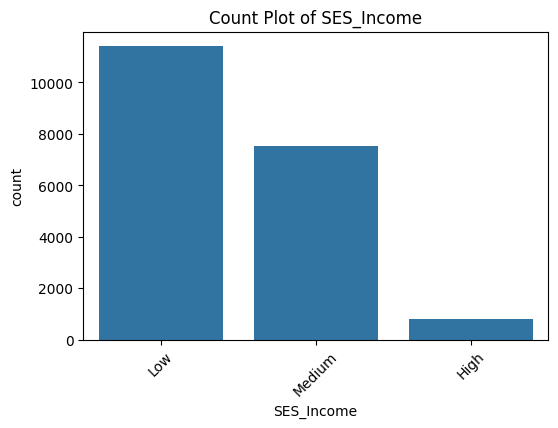

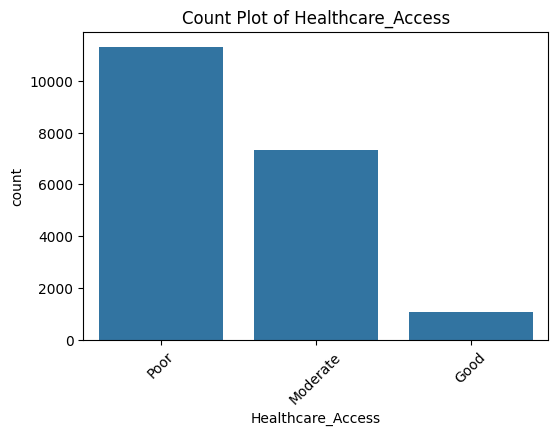

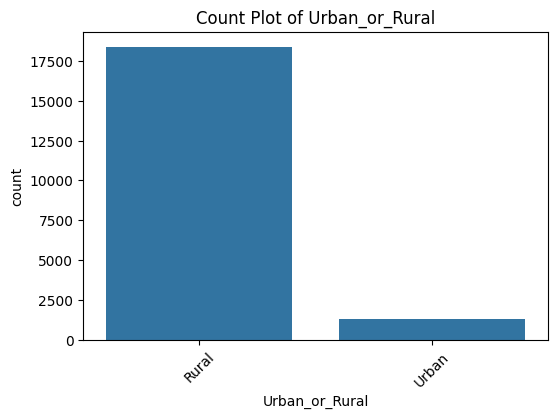

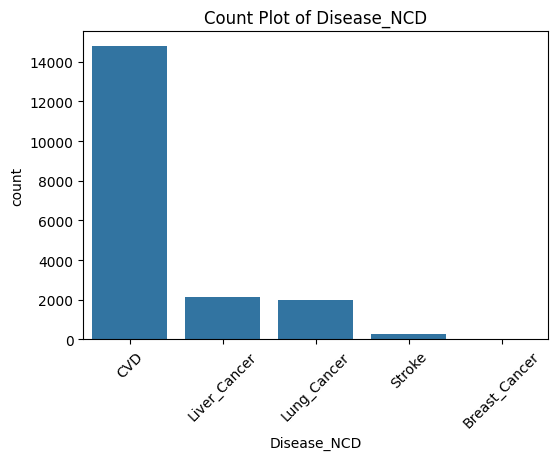

In [18]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count Plot of {col}")
    plt.show()

### Boxplots (Numerical vs Disease)

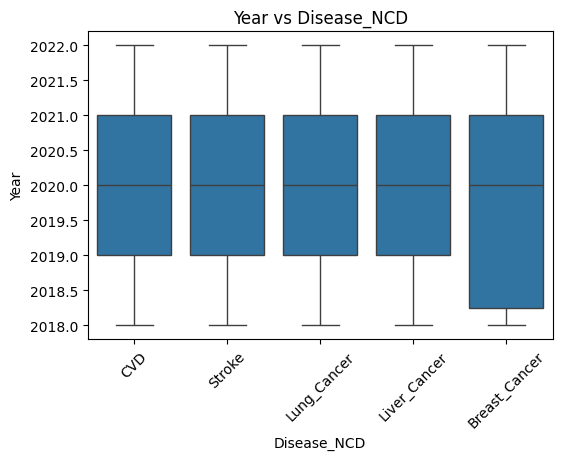

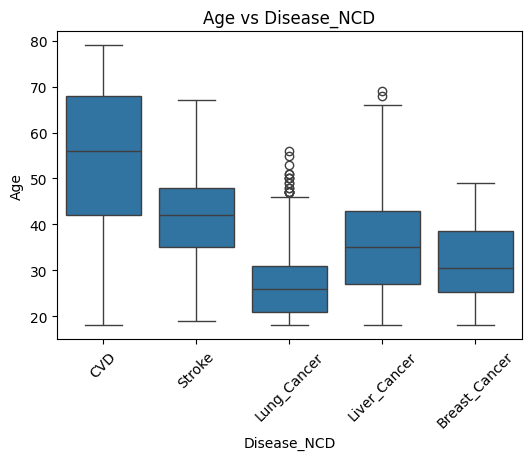

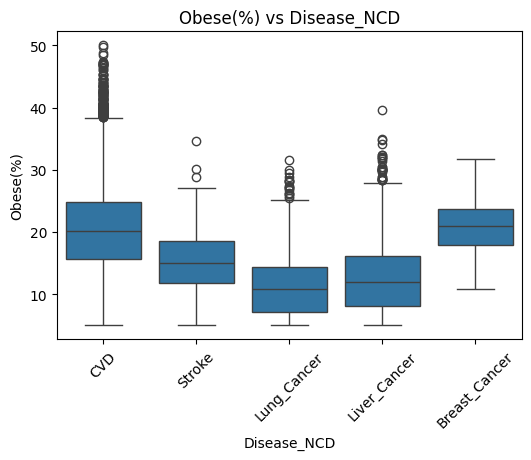

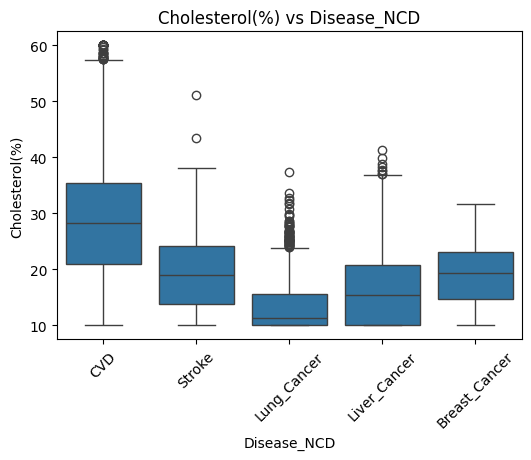

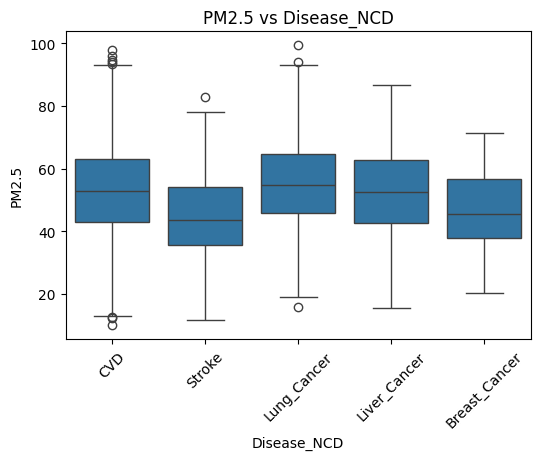

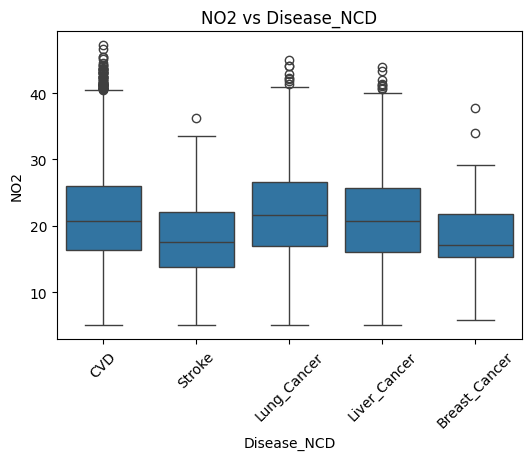

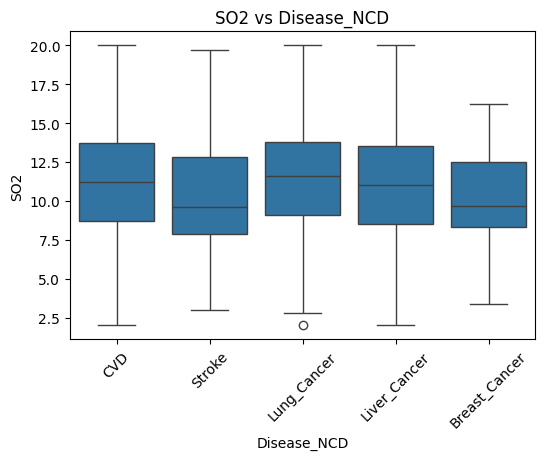

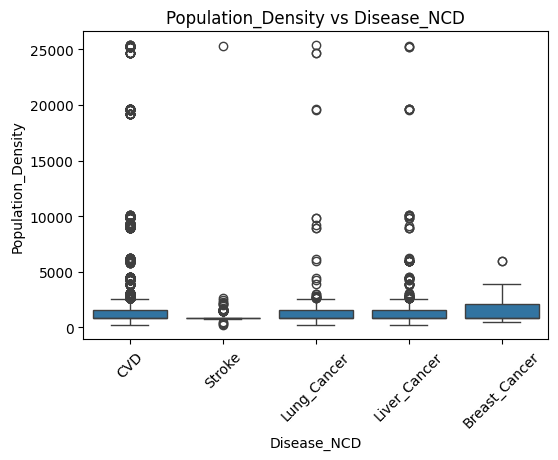

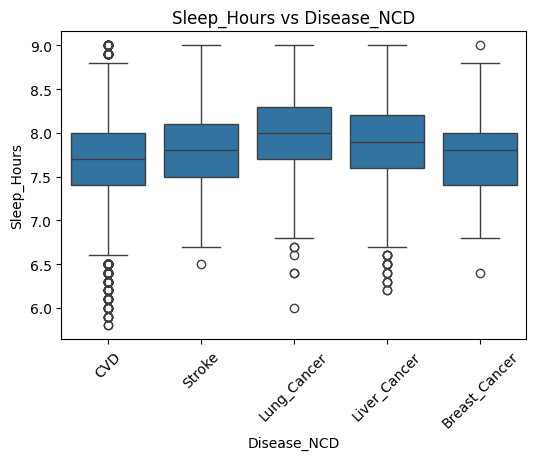

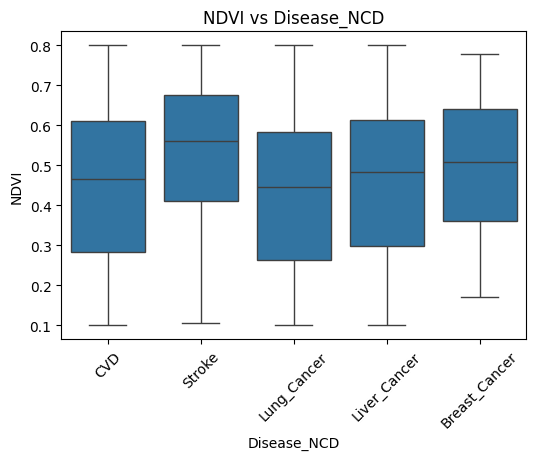

In [19]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="Disease_NCD", y=col)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Disease_NCD")
    plt.show()

### Pairplot for Key Variables

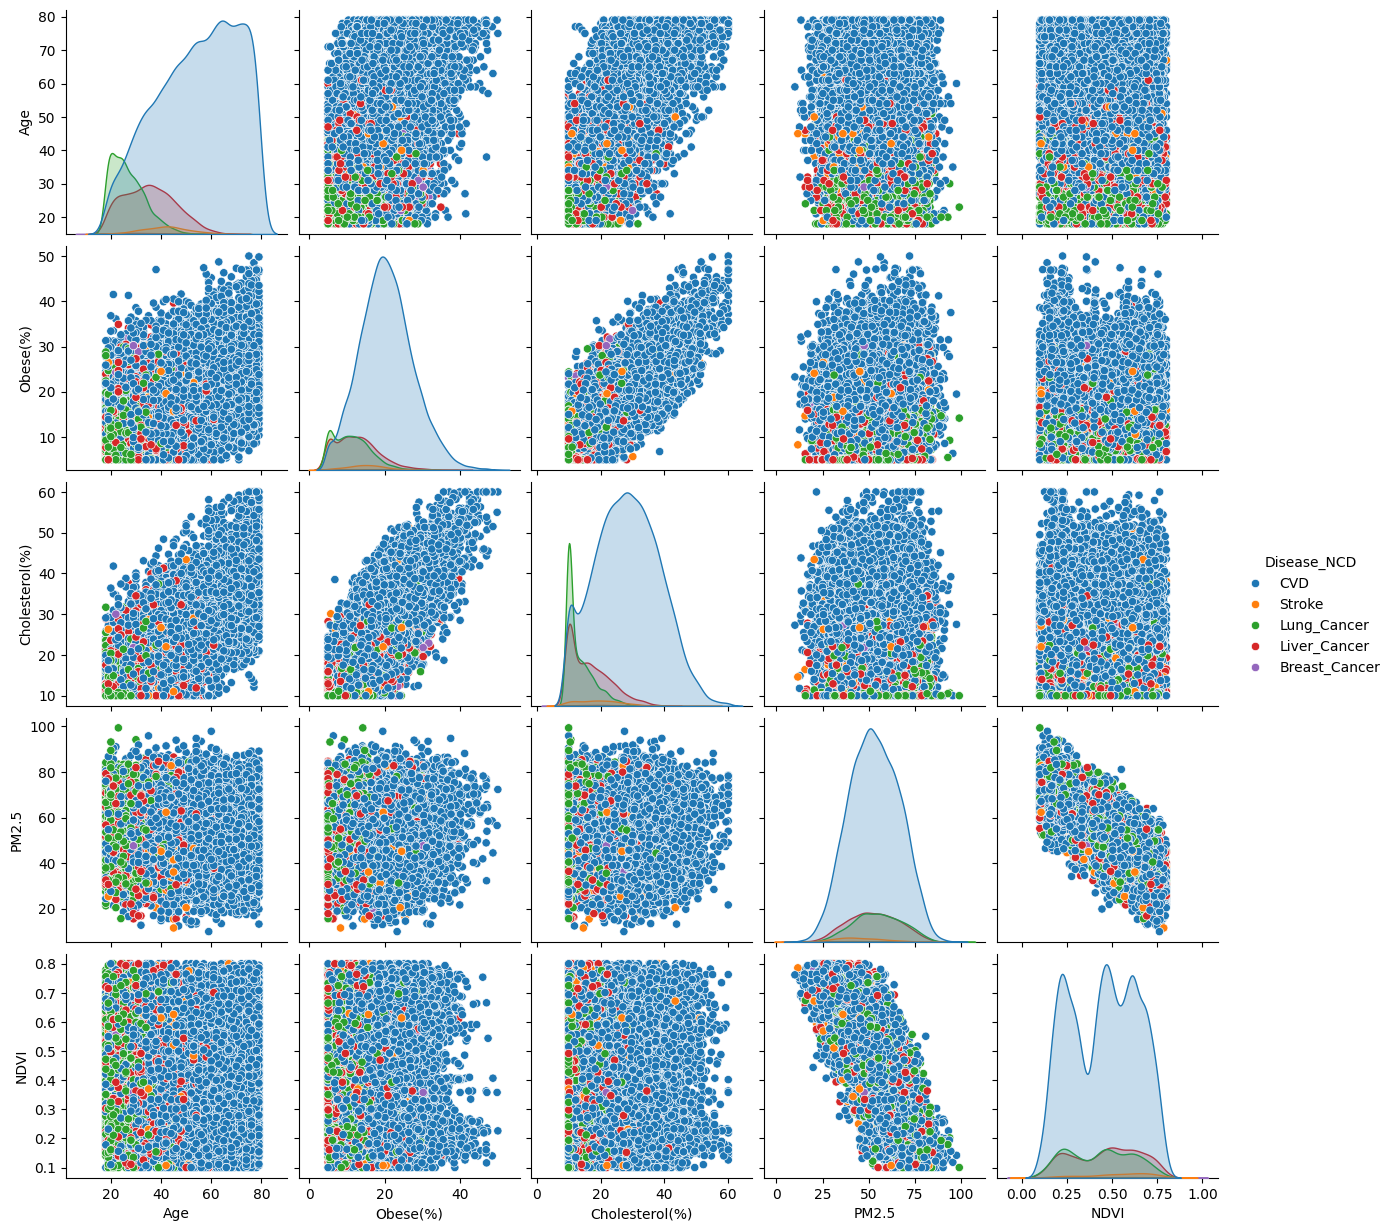

In [20]:
sns.pairplot(df, vars=["Age","Obese(%)","Cholesterol(%)","PM2.5","NDVI"],
             hue="Disease_NCD")
plt.show()

In [43]:
import geopandas as gpd
df = pd.read_csv("data/data.csv")

gdf = gpd.read_file("data/india_districts.json")

print(gdf.columns)   
print(gdf.head())    


Index(['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry'],
      dtype='object')
       GID_2 GID_0 COUNTRY    GID_1             NAME_1 NL_NAME_1  \
0  IND.1.1_1   IND   India  IND.1_1  AndamanandNicobar        NA   
1  IND.1.2_1   IND   India  IND.1_1  AndamanandNicobar        NA   
2  IND.1.3_1   IND   India  IND.1_1  AndamanandNicobar        NA   
3  IND.2.1_1   IND   India  IND.2_1      AndhraPradesh        NA   
4  IND.2.2_1   IND   India  IND.2_1      AndhraPradesh        NA   

                  NAME_2            VARNAME_2 NL_NAME_2    TYPE_2 ENGTYPE_2  \
0         NicobarIslands                   NA        NA  District  District   
1  NorthandMiddleAndaman                   NA        NA  District  District   
2           SouthAndaman                   NA        NA  District  District   
3              Anantapur  Anantpur,Ananthapur        NA  District  District   
4 

<Figure size 1200x800 with 0 Axes>

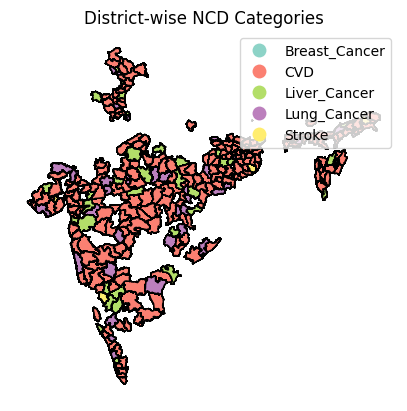

<Figure size 1200x800 with 0 Axes>

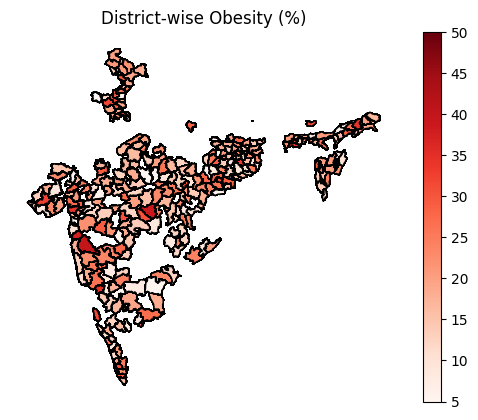

<Figure size 1200x800 with 0 Axes>

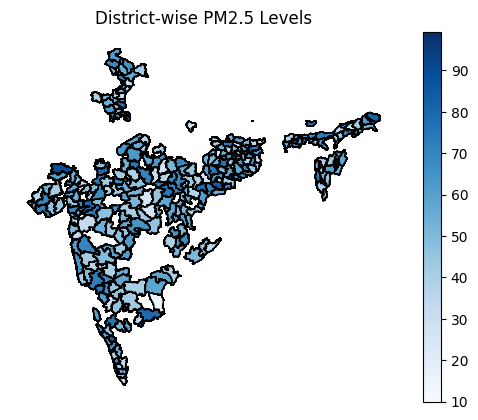

<Figure size 1200x800 with 0 Axes>

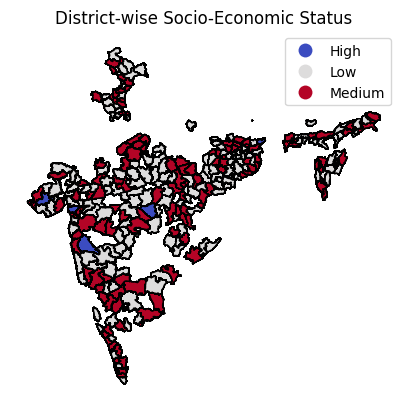

In [ ]:
import geopandas as gpd
df = pd.read_csv("data/data.csv")
gdf = gpd.read_file("data/india_districts.json")  

gdf.to_file("india_districts.shp", driver="ESRI Shapefile")

gdf["District"] = gdf["NAME_2"].str.strip().str.title()

df["District"] = df["District"].str.strip().str.title()
merged = gdf.merge(df, on="District", how="left")


plt.figure(figsize=(12,8))
merged.plot(column="Disease_NCD", cmap="Set3", legend=True, edgecolor="black")
plt.title("District-wise NCD Categories")
plt.axis("off")
plt.show()

plt.figure(figsize=(12,8))
merged.plot(column="Obese(%)", cmap="Reds", legend=True, edgecolor="black")
plt.title("District-wise Obesity (%)")
plt.axis("off")
plt.show()

plt.figure(figsize=(12,8))
merged.plot(column="PM2.5", cmap="Blues", legend=True, edgecolor="black")
plt.title("District-wise PM2.5 Levels")
plt.axis("off")
plt.show()

plt.figure(figsize=(12,8))
merged.plot(column="SES_Income", cmap="coolwarm", legend=True, edgecolor="black")
plt.title("District-wise Socio-Economic Status")
plt.axis("off")
plt.show()


#####  Insights
Spatial Mapping:

    Higher prevalence of hypertension and diabetes clusters are visible in urban and industrial districts.
    Southern and western states show better lifestyle indicators compared to central belt.

Countplots:

    High tobacco usage is concentrated in rural-dominated districts.

Pairplots:

    Strong positive correlation between Obesity and hypertension prevalence.
    Education levels negatively correlate with smoking and alcohol consumption.

####  Multivariate analysis using pieplot

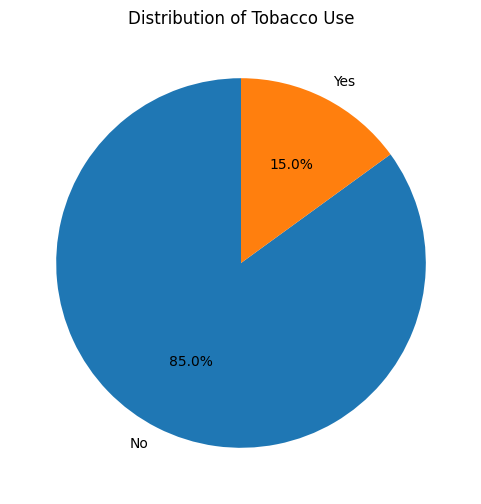

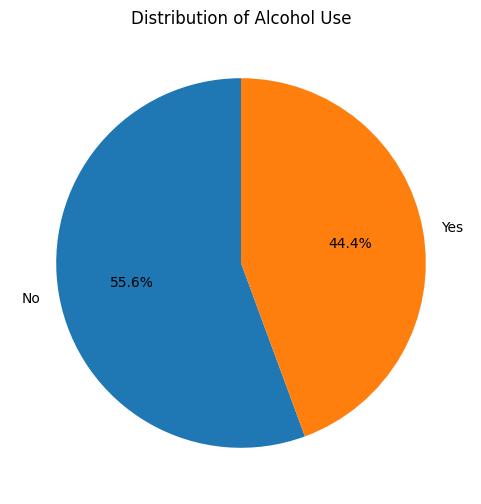

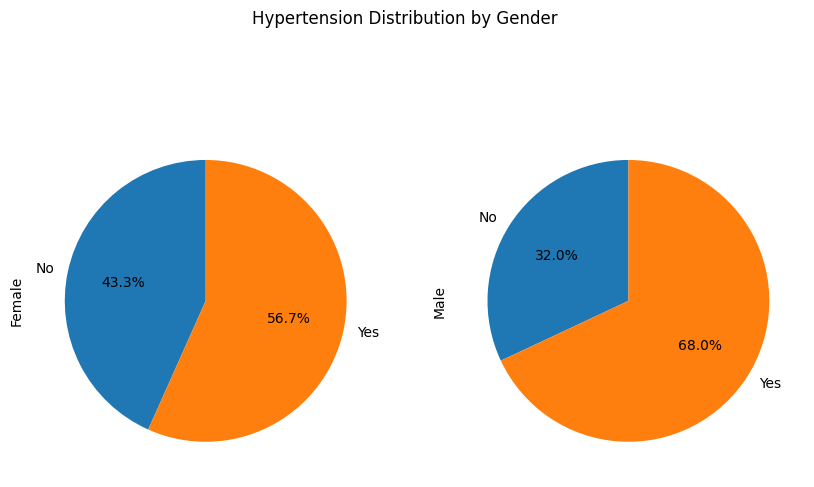

In [41]:
df = pd.read_csv("data/data.csv")
tobacco_counts = df['Tobacco_Use'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(tobacco_counts, labels=tobacco_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Tobacco Use")
plt.show()
alcohol_counts = df['Alcohol_Use'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Alcohol Use")
plt.show()
hypertension = pd.crosstab(df['Hypertension'], df['Gender'])
hypertension.plot(
    kind='pie', 
    subplots=True, 
    autopct='%1.1f%%', 
    legend=False, 
    figsize=(10,6), 
    startangle=90
)
plt.suptitle("Hypertension Distribution by Gender")
plt.show()


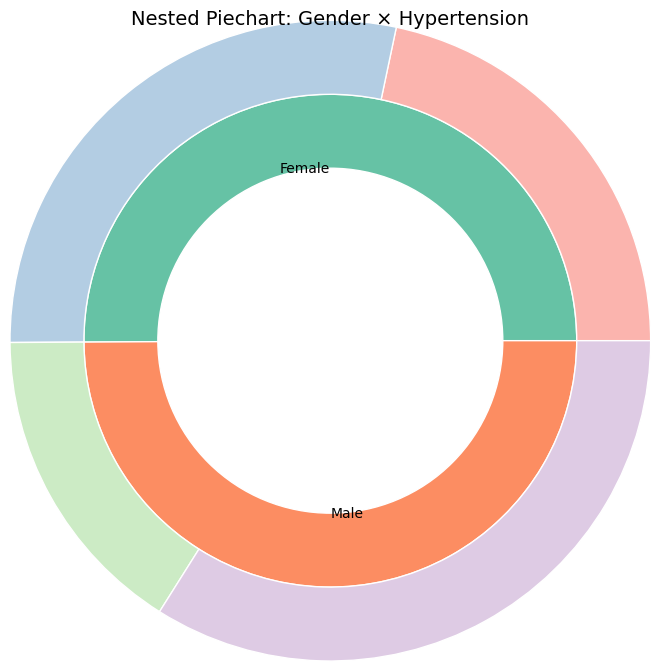

In [42]:
df = pd.read_csv("data/data.csv")
cross_tab = pd.crosstab(df['Gender'], df['Hypertension'])

# Flatten counts
inner_labels = cross_tab.index   # Genders
outer_labels = cross_tab.columns # Hypertension categories (Yes/No)
inner_counts = df['Gender'].value_counts()
outer_counts = cross_tab.values.flatten()
colors = plt.cm.Set2.colors
outer_colors = plt.cm.Pastel1.colors
fig, ax = plt.subplots(figsize=(8,8))
wedges1, _ = ax.pie(inner_counts, 
                    radius=1, 
                    labels=inner_labels, 
                    labeldistance=0.7,
                    colors=colors,
                    wedgeprops=dict(width=0.3, edgecolor='w'))
wedges2, _ = ax.pie(outer_counts, 
                    radius=1.3, 
                    labels=None, 
                    colors=outer_colors,
                    wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title("Nested Piechart: Gender × Hypertension", fontsize=14)
plt.show()


#####  Insights
Majority of individuals do not use tobacco (≈85%), while only ~15% reported usage.

(~56%) do not consume alcohol , while (~44%) consumes alcohol.

Hypertension distribution in Males is around (68%) while in Females is around (56.7%).

Nested Piecharts denotes:
     ->Inner ring → Gender distribution
     ->Outer ring → Hypertension split within each gender